In [1]:
import pandas as pd
import numpy as np

In [37]:
sd = pd.read_csv("TitanPolicySalesData.csv", header=0)

In [42]:
sd.T.reset_index(inplace=True)

In [44]:
sd.head(1)

,index,SALESPERSON,Old Scheme,New Scheme
0,0,1,57,62


In [61]:
old_mean = sd['Old Scheme'].mean()
old_mean

68.03333333333333

In [62]:
new_mean = sd['New Scheme'].mean()
new_mean

72.03333333333333

Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs? (8 points)

Cosidering below for hypothesis... Using One-Tail Test

H0 : mean_new_scheme = mean_old_scheme

H1 : mean_new_scheme > mean_old_scheme

In [88]:
sd[['Old Scheme','New Scheme']].describe()

,Old Scheme,New Scheme
count,30.000000,30.000000
mean,68.033333,72.033333
std,20.455980,24.062395
min,28.000000,32.000000
25%,54.000000,55.000000
50%,67.000000,74.000000
75%,81.500000,85.750000
max,110.000000,122.000000


Statistics=0.940, p=0.089


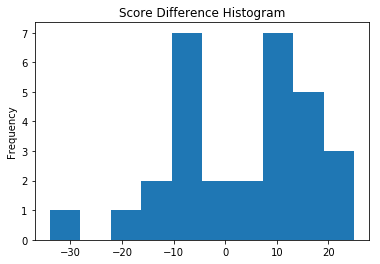

In [90]:
## Test for Normality 
sd.diff = sd['New Scheme'] - sd['Old Scheme']
sd.diff.plot(kind='hist', title= 'Score Difference Histogram')

from scipy.stats import shapiro
stat, p = shapiro(sd.diff)
print('Statistics=%.3f, p=%.3f' % (stat, p))


In [92]:
from scipy.stats import ttest_rel
two_sample = ttest_rel(sd['New Scheme'], sd['Old Scheme'])
two_sample

Ttest_relResult(statistic=1.5559143823544377, pvalue=0.13057553961337662)

In [93]:
import scipy.stats

diff_1s_ttest_pValue = scipy.stats.ttest_1samp(sd.diff, 0)
print("t Test:", diff_1s_ttest_pValue)

t Test: Ttest_1sampResult(statistic=1.5559143823544377, pvalue=0.13057553961337662)


p_Value is 0.13015 shows the strog evidence with alpha = 0.05 that new scheme doesn't make much difference.

as the p_Value > alpha

So except the null hypothesis

# Above solution answers Question 2 & 3

In [75]:
from math import sqrt

In [76]:
import scipy.stats as stats

# Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is:
        a) The probability of a type 1 error? (2 points)

        b) What is the p- value of the hypothesis test if we test for a difference of $5000? (8 points)

        c) Power of the test (5 points)

In [133]:
# as we already calculated the differance of Old Scheme and New Scheme
# Lets Calculate the t_state using the hypothesised mean difference value of 5K

# H0 : new_mean - old_mean = 0
# H1 : new_mean - old_mean > 0

mu_d = 0
mean_d = sd.diff.mean()
std_d = sd.diff.std(ddof=29)
print(std_d, mean_d)

75.82875444051551 4.0


In [134]:
t_stat = (mean_d - mu_d)/(std_d/sqrt(30))
t_stat

0.28892604740584604

In [135]:
p_value = stats.t.cdf(t_stat, df = 29 )
p_value



0.6126533366330706

Making Type 1 error:

Answer 4 a : Probability of making Type 1 error is 61%

Answer 4 b:



In [136]:
mu_d_5k = 5

In [139]:
t_stat_5k = (mean_d - mu_d_5k)/(std_d/sqrt(30))
p_value_5k = stats.t.cdf(t_stat_5k, df = 29)
print(p_value_5k, t_stat_5k)


0.47145677206066233 -0.07223151185146151


Type II error : 

for significance level of 0.05 t-test critical value is : 1.699 for degree of freedom n-1 = 29